In [1]:
%matplotlib inline  

import numpy as np
from numpy import exp
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(7,7) #sets the default image size
#plt.rcParams["figure.dpi"]=(300)

### 6.4.2 Heat capacity of a solid
Debye's theory of solids gives the heat capacity of a solid at temperature $T$ to be

$$C_V = 9V\rho k_B (\frac{T}{\theta_D})^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx$$

where $V$ is the volume of the solid, $\rho$ is the density of atoms, $k_B$ is Boltzmann constant, and $\theta$ is the Debye temperature.

- Write a program to calculate $C_V$ for a given value of $T$ for a sample of 1000 $cm^3$ of aluminum, in which the density $\rho$ is 6.022 $\times 10^{28} m^3$ and $\theta_D$ = 428 K. 

- Choose at least one wa to do the integral from the followings
     - Simpson or trapezoid rule by yourself
     - one built-function from scipy

- Plot $C_V$ as a function of temperature from $T$ = 5 K to $T$ = 500 K.

In [2]:
def Debye(T,T_D,V,rho):
    
    kb = 1.381*10**(-23)
    A = 9*V*rho*kb*((T/T_D)**3)
    def Trapezoid(func, lower=0, upper=1, divs=20):
    
        # delta x
        del_x = (upper - lower)/(divs)
        # array of x=values from lower to upper, with divs+1 elements
        x_values = np.linspace(lower, upper, divs +1)
        y_values = np.zeros(divs+1)
        # calculates the y-values
        for i in range(divs+1):
            if i==0 or i==divs:
                y_values[i] = func(x_values[i])
            else:
                y_values[i] = 2*func(x_values[i])

        area = del_x/2*np.sum(y_values)

    #     print("x array", x_values)
    #     print("y array", y_values)
        return area
    
    f1 = lambda x: (x**4)*exp(x)
    f2 = lambda x: (exp(x)-1)**2
    Cv = lambda x: A*f1(x)/f2(x)
    
    # value close to zero, to prevent division by zero
    lower_bound = 10**-15
    
    return Trapezoid(Cv,lower_bound,T_D/T,divs=100)

In [3]:
Temp_i = 5
Temp_f=500
Debye_temp = 428
V = 10**-3
rho = 6.022*10**28

Temperature = np.linspace(Temp_i,Temp_f,1000)
Cv = np.zeros(1000)
for i in range(1000):
    Cv[i]=Debye(Temperature[i],Debye_temp,V,rho)

# print(Temperature)
# print(Cv)

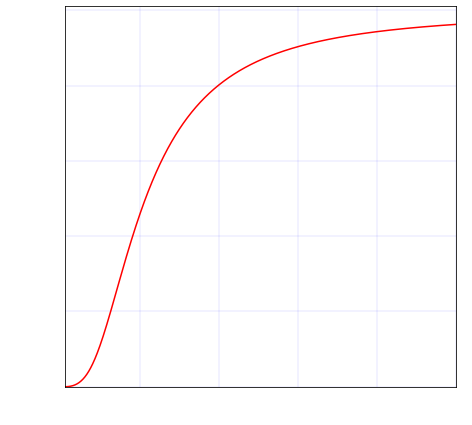

In [4]:
# Plot text color, uncomment 'black' for a light background
COLOR = 'white'
# COLOR = 'black'

plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.plot(Temperature,Cv,'r')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity of a Solid \n(J / Kg K)')
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.axis(xmin=Temp_i,xmax=Temp_f,ymin=0)
plt.show()